# BASICS OF PYTHON | SESSION 5

---
Sina Shafiezadeh | October 2024
---


Please follow the next steps over the next 3 hours in order to complete your exam successfully:


1. Download **Spotify Song Attributes** dataset from [HERE](https://www.kaggle.com/datasets/geomack/spotifyclassification).
2. Import dataset in **Google Colab**.
3. Overview dataset and define **one reasonable question**. An important point is to select a question that you will be able to implement statistical tests and plotting.
4. **Preprocess** the dataset to start your analysis.
5. Implement the **statistical models**.
6. **Plot** your results.
7. Set up your **GitHub** account. You can get help from this [LINK](https://docs.aws.amazon.com/codedeploy/latest/userguide/tutorials-github-create-github-account.html).
8. Upload your code and results in a **repository**.
9. Modify the repository title and description then **publish it**.
10. **Share your public repository** [HERE](https://docs.google.com/spreadsheets/d/1bveNOi9efLNgxqxh5uH5xhNG57bQ7DPCnG_sLAX4wmY/edit?usp=sharing).


# 1.&nbsp;Data Importing

In [76]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')
data = pd.read_csv('drive/MyDrive/data.csv')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 2.&nbsp;Data Cleaning (overview)

In [77]:
print(data)
print("===========================")
print(data.shape)
print("===========================")
print(data.info)
print("===========================")
print(data.describe)


      Unnamed: 0  acousticness  danceability  duration_ms  energy  \
0              0       0.01020         0.833       204600   0.434   
1              1       0.19900         0.743       326933   0.359   
2              2       0.03440         0.838       185707   0.412   
3              3       0.60400         0.494       199413   0.338   
4              4       0.18000         0.678       392893   0.561   
...          ...           ...           ...          ...     ...   
2012        2012       0.00106         0.584       274404   0.932   
2013        2013       0.08770         0.894       182182   0.892   
2014        2014       0.00857         0.637       207200   0.935   
2015        2015       0.00164         0.557       185600   0.992   
2016        2016       0.00281         0.446       204520   0.915   

      instrumentalness  key  liveness  loudness  mode  speechiness    tempo  \
0             0.021900    2    0.1650    -8.795     1       0.4310  150.062   
1            

# 3.&nbsp;Data Cleaning (interpretability)

In [78]:
# firs, i wanted to convert ms in minutes: it's more common to see the music duration in minutes
data['duration_ms'] = round(data['duration_ms'] / (1000 * 60), 2)
data.rename(columns={'duration_ms': 'duration_min'}, inplace=True)
#i converted all the scales from 0 to 1 in scales from 0 to 10 just to make the dataset more clear
data['acousticness'] = round(data['acousticness'] * 10, 2)
data['danceability'] = round(data['danceability'] * 10, 2)
data['energy'] = round(data['energy'] * 10, 2)
data['instrumentalness'] = round(data['instrumentalness'] * 10, 2)
data['liveness'] = round(data['liveness'] * 10, 2)
data['speechiness'] = round(data['speechiness'] * 10, 2)
data["valence"] = round(data["valence"]*10, 2)
#i converted the values of every key in the corresponding note
key_map = {
    0: 'C',
    1: 'C#',
    2: 'D',
    3: 'D#',
    4: 'E',
    5: 'F',
    6: 'F#',
    7: 'G',
    8: 'G#',
    9: 'A',
    10: 'A#',
    11: 'B'
}

time_signature_map = {
    3: '3/4',
    4: '4/4',
    5: '5/4',
    6: '6/8'
}

# Convert the 'time_signature' column to the corresponding musical signature
data['time_signature'] = data['time_signature'].map(time_signature_map)
data['key'] = data['key'].map(key_map)
#i did the the same operation of the second step for the loudness: it's more difficoult to read data in terms of dB so i converted the values in a scale from 0 to 10
min_loudness = -60
max_loudness = 0
data['loudness'] = round(((data['loudness'] - min_loudness) / (max_loudness - min_loudness)) * 10, 0)
print(data)

      Unnamed: 0  acousticness  danceability  duration_min  energy  \
0              0          0.10          8.33          3.41    4.34   
1              1          1.99          7.43          5.45    3.59   
2              2          0.34          8.38          3.10    4.12   
3              3          6.04          4.94          3.32    3.38   
4              4          1.80          6.78          6.55    5.61   
...          ...           ...           ...           ...     ...   
2012        2012          0.01          5.84          4.57    9.32   
2013        2013          0.88          8.94          3.04    8.92   
2014        2014          0.09          6.37          3.45    9.35   
2015        2015          0.02          5.57          3.09    9.92   
2016        2016          0.03          4.46          3.41    9.15   

      instrumentalness key  liveness  loudness  mode  speechiness    tempo  \
0                 0.22   D      1.65       9.0     1         4.31  150.062   
1  

# 4.&nbsp;Data Cleaning (reduction)

# 5.&nbsp;Data Cleaning (noisy data)

Series([], dtype: int64)


# 6.&nbsp;Data Cleaning (completeness)

In [79]:
null_values = data.isnull().sum()
print(null_values[null_values > 0])
#dataset has no null values. We can continue our analysis :)

time_signature    1
dtype: int64


# 7.&nbsp;Data Exploring


In [80]:
#mean and standard deviation for all the variables that allow these operations
if 'Unnamed: 0' in data.columns:
    data.drop(columns=['Unnamed: 0'], inplace=True)
numeric_columns = data.select_dtypes(include=['number'])
mean_values = numeric_columns.mean()
std_values = numeric_columns.std()
summary_stats = pd.DataFrame({'Mean': mean_values, 'Standard Deviation': std_values})
print(summary_stats)

                        Mean  Standard Deviation
acousticness        1.875830            2.599945
danceability        6.184219            1.610290
duration_min        4.105151            1.366276
energy              6.815791            2.102673
instrumentalness    1.332732            2.731679
liveness            1.908463            1.554519
loudness            8.788795            0.644739
mode                0.612295            0.487347
speechiness         0.926668            0.899330
tempo             121.603272           26.685604
valence             4.968156            2.471946
target              0.505702            0.500091


# 8.&nbsp;Data Analysis

In [90]:
from scipy import stats
pairs = [
    ('loudness', 'energy'),
    ('tempo', 'danceability'),
    ('speechiness', 'valence'),
    ('instrumentalness', 'valence')
]


correlation_results = pd.DataFrame(columns=['Variable 1', 'Variable 2', 'Correlation', 'P-Value'])

pairs = [
    ('loudness', 'energy'),
    ('tempo', 'danceability'),
    ('speechiness', 'valence'),
    ('instrumentalness', 'valence')
]


correlation_results = []

for var1, var2 in pairs:
    correlation, p_value = stats.pearsonr(data[var1], data[var2])
    correlation_results.append({
        'Variable 1': var1,
        'Variable 2': var2,
        'Correlation': correlation,
        'P-Value': p_value
    })


correlation_results_data = pd.DataFrame(correlation_results)


print(correlation_results_data)

         Variable 1    Variable 2  Correlation        P-Value
0          loudness        energy     0.679828  1.109503e-273
1             tempo  danceability    -0.143538   9.417483e-11
2       speechiness       valence     0.054445   1.446654e-02
3  instrumentalness       valence    -0.194631   1.143116e-18


# 9.&nbsp;Data Visualization

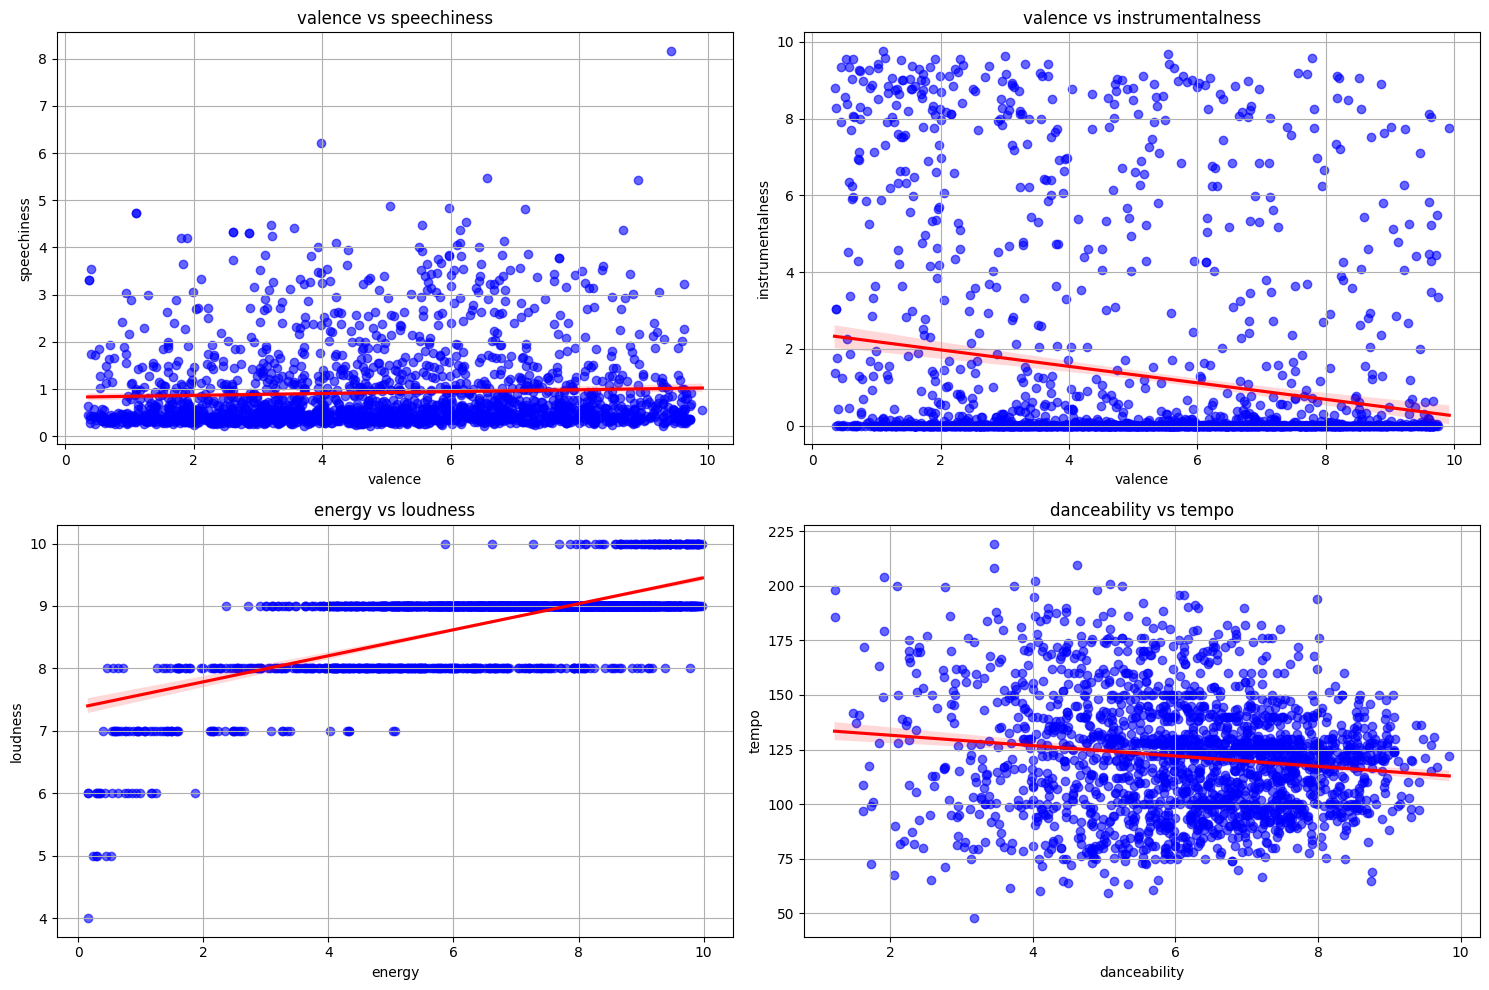

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns
pairs = [
    ('valence', 'speechiness'),
    ('valence', 'instrumentalness'),
    ('energy', 'loudness'),
    ('danceability', 'tempo')
]


plt.figure(figsize=(15, 10))

for i, (var1, var2) in enumerate(pairs):
    plt.subplot(2, 2, i + 1)
    sns.regplot(x=data[var1], y=data[var2], scatter_kws={'color': 'blue', 'alpha': 0.6}, line_kws={'color': 'red'})
    plt.title(f'{var1} vs {var2}')
    plt.xlabel(var1)
    plt.ylabel(var2)
    plt.grid(True)


plt.tight_layout()
plt.show()


# 10.&nbsp;Data Exporting